In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

def bak_sneppen_1D(n_iterations, skip_iterations, n_species):
    # Initialize the system
    fitness = np.random.rand(n_species)
    threshold = 0.65
    gap_function_value = 0
    min_fitness = np.zeros(n_iterations - skip_iterations)
    fitness_history = []
    #avalanche_sizes_local = []
    avalanche_sizes_global = []
    #avalanche_activity_local = []
    avalanche_activity_global = []
    avalanche = False
    #avalanche_size_local = 0
    avalanche_size_global = 0

    for i in range(n_iterations):
        # species with minimum fitness value
        min_index = np.argmin(fitness)

        # assign a new random fitness value to the selected species
        fitness[min_index] = np.random.rand()

        # check neighbors and update their fitness if below the threshold
       
        fitness[min_index - 1] = np.random.rand()
        if min_index < n_species - 1:
            fitness[min_index + 1] = np.random.rand()
        # periodic boundary
        elif min_index == n_species -1:
            fitness[0] = np.random.rand()

        min_fitness_value = np.min(fitness)
        # if min_fitness_value > gap_function_value:
        #     gap_function_value = min_fitness_value
        #     # print(f'{gap_function_value}, iteration: {i}')
        #     threshold = gap_function_value - 0.01
        
        # skip iterations to start at the critical state
        if i >= skip_iterations:
           # fitness_history.append(fitness)
            

            # save minimum fitness for each iteration
            min_fitness[i - skip_iterations] = min_fitness_value

            # if avalanche in progress
            if min_fitness_value < threshold and avalanche == True:
                # seperate counter for local activity
               # if min_index >= local_segment[0] and min_index < local_segment[1]:
                   # avalanche_size_local += 1
                    #avalanche_activity_local.append(i-skip_iterations)

                avalanche_size_global += 1
                avalanche_activity_global.append(i-skip_iterations)

            # start of new avalanche
            if min_fitness_value < threshold and avalanche == False:
                # print(f'avalanche start i: {i}')
                # avalanche_size += 1
                avalanche = True

            # end of an avalanche
            if min_fitness_value >= threshold and avalanche == True:
                # print(f'avalanche end i: {i}')

                #avalanche_sizes_local.append(avalanche_size_local)
                avalanche_sizes_global.append(avalanche_size_global)
                avalanche_size_local = 0
                avalanche_size_global = 0
                avalanche = False


    return min_fitness, avalanche_sizes_global, avalanche_activity_global



Avalanche size distribution

In [2]:
# run simulation for different system sizes to compare
system_sizes = [32, 128, 512, 2048]
n_iterations = 10**8
skip_iterations = 200000

avalanche_sizes_list = []

for n_species in system_sizes:
    min_fitness, avalanche_sizes_global, avalanche_activity_global = bak_sneppen_1D(n_iterations, skip_iterations, n_species)
    avalanche_sizes_list.append(avalanche_sizes_global)


2980
2980
498
498


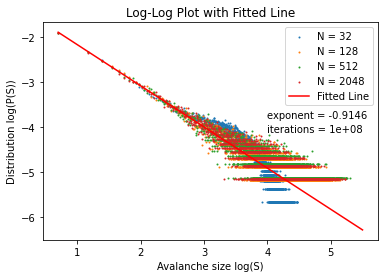

Exponent: -0.9146339399097757


In [22]:
import numpy as np
import matplotlib.pyplot as plt

bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[3]),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[3]) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[3], bins, density=True)

# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for j in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[j] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
        bins_plot.append(all_bins[j])


print(len(bins_plot))
print(len(avalanche_size_distribution_plot))


threshold = 5000

bins_filtered = [value1 for value1 in bins_plot if value1 <= threshold]
avalanche_sizes_global_filtered = [value2 for value1, value2 in zip(bins_filtered, avalanche_size_distribution_plot) if value1 <= threshold]

print(len(bins_filtered))
print(len(avalanche_sizes_global_filtered))


# Take the logarithm of the filtered data
log_bins = np.log10(bins_filtered)
log_sizes = np.log10(avalanche_sizes_global_filtered)

# Fit a straight line through linear regression
coefficients = np.polyfit(log_bins, log_sizes, 1)
exponent = coefficients[0]

# Generate the fitted line
fit_x = np.linspace(min(log_bins), 5.5, 100)
fit_y = coefficients[0] * fit_x + coefficients[1]

# Plot the log-log data and the fitted line
system_sizes = [32, 128, 512, 2048]

for i in range(len(avalanche_sizes_list)):
    # bins of avalanche sizes
    bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
    all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
    avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[i], bins, density=True)

    # remove bins were value is zero
    avalanche_size_distribution_plot = []
    bins_plot = []
    for j in range(len(avalanche_size_distribution)):
        if avalanche_size_distribution[j] != 0:
            avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
            bins_plot.append(all_bins[j])


    # print(avalanche_size_distribution_plot)
    # print(bins_plot)
    # print(len(avalanche_sizes_global))
    
    log_bins = np.log10(bins_plot)
    log_sizes = np.log10(avalanche_size_distribution_plot)
    plt.scatter(log_bins, log_sizes, label=f'N = {system_sizes[i]}', s=1)
    
    
plt.plot(fit_x, fit_y, 'r-', label='Fitted Line')
plt.xlabel('Avalanche size log(S)')
plt.ylabel('Distribution log(P(S))')
plt.title('Log-Log Plot with Fitted Line')
#exponent_label = f'exponent = {exponent:.4f}'
#iterations_label = f'iterations = {n_iterations:.0e}'
#handles = [Text(0, 0, "")]  
#labels = [''] 
#plt.legend(handles, labels, title="Legend")
#plt.text(4, -3.7, exponent_label, transform=plt.gca().transAxes)
#plt.text(4, -4, iterations_label, transform=plt.gca().transAxes)
plt.text(4,-3.8,r'exponent = {}'.format('%.4f'% exponent))
iterations_label = f'iterations = {n_iterations:.0e}'
plt.text(4, -4.1, iterations_label)
plt.legend()
plt.show()

# Print the exponent of the fitted line
print("Exponent:", exponent)

In [2]:
# run simulation for different system sizes to compare
import numpy as np
import matplotlib.pyplot as plt

system_sizes = [32, 128, 512, 2048]
n_iterations = 10**6
skip_iterations = 200000

avalanche_sizes_list = []

for n_species in system_sizes:
    min_fitness, avalanche_sizes_global, avalanche_activity_global = bak_sneppen_1D(n_iterations, skip_iterations, n_species)
    avalanche_sizes_list.append(avalanche_sizes_global)

68
68
10
10


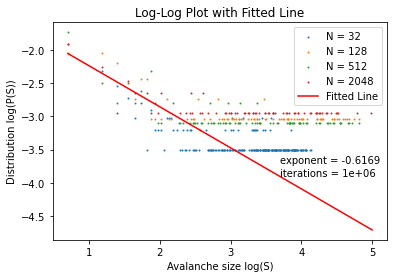

Exponent: -0.616857466140432


In [14]:
bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[3]),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[3]) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[3], bins, density=True)

# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for j in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[j] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
        bins_plot.append(all_bins[j])


print(len(bins_plot))
print(len(avalanche_size_distribution_plot))


threshold = 200

bins_filtered = [value1 for value1 in bins_plot if value1 <= threshold]
avalanche_sizes_global_filtered = [value2 for value1, value2 in zip(bins_filtered, avalanche_size_distribution_plot) if value1 <= threshold]

print(len(bins_filtered))
print(len(avalanche_sizes_global_filtered))


# Take the logarithm of the filtered data
log_bins = np.log10(bins_filtered)
log_sizes = np.log10(avalanche_sizes_global_filtered)

# Fit a straight line through linear regression
coefficients = np.polyfit(log_bins, log_sizes, 1)
exponent = coefficients[0]

# Generate the fitted line
fit_x = np.linspace(min(log_bins), 5, 100)
fit_y = coefficients[0] * fit_x + coefficients[1]

# Plot the log-log data and the fitted line
system_sizes = [32, 128, 512, 2048]

for i in range(len(avalanche_sizes_list)):
    # bins of avalanche sizes
    bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
    all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
    avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[i], bins, density=True)

    # remove bins were value is zero
    avalanche_size_distribution_plot = []
    bins_plot = []
    for j in range(len(avalanche_size_distribution)):
        if avalanche_size_distribution[j] != 0:
            avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
            bins_plot.append(all_bins[j])


    # print(avalanche_size_distribution_plot)
    # print(bins_plot)
    # print(len(avalanche_sizes_global))
    
    log_bins = np.log10(bins_plot)
    log_sizes = np.log10(avalanche_size_distribution_plot)
    plt.scatter(log_bins, log_sizes, label=f'N = {system_sizes[i]}', s=1)
    
    
plt.plot(fit_x, fit_y, 'r-', label='Fitted Line')
plt.xlabel('Avalanche size log(S)')
plt.ylabel('Distribution log(P(S))')
plt.title('Log-Log Plot with Fitted Line')
#exponent_label = f'exponent = {exponent:.4f}'
#iterations_label = f'iterations = {n_iterations:.0e}'
#handles = [Text(0, 0, "")]  
#labels = [''] 
#plt.legend(handles, labels, title="Legend")
#plt.text(4, -3.7, exponent_label, transform=plt.gca().transAxes)
#plt.text(4, -4, iterations_label, transform=plt.gca().transAxes)
plt.text(3.7,-3.7,r'exponent = {}'.format('%.4f'% exponent))
iterations_label = f'iterations = {n_iterations:.0e}'
plt.text(3.7, -3.9, iterations_label)
plt.legend()
plt.show()

# Print the exponent of the fitted line
print("Exponent:", exponent)


In [36]:
# run simulation for different system sizes to compare
import numpy as np
import matplotlib.pyplot as plt

system_sizes = [32, 128, 512, 2048]
n_iterations = 10**7
skip_iterations = 200000

avalanche_sizes_list = []

for n_species in system_sizes:
    min_fitness, avalanche_sizes_global, avalanche_activity_global = bak_sneppen_1D(n_iterations, skip_iterations, n_species)
    avalanche_sizes_list.append(avalanche_sizes_global)

650
650
164
164


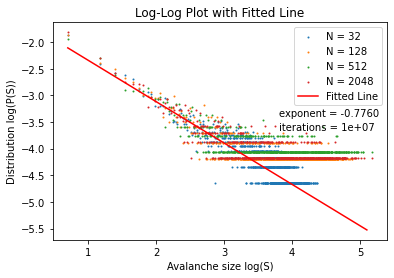

Exponent: -0.7759523403882904


In [43]:
bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[3]),10)]
all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[3]) - 10,10)]
avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[3], bins, density=True)

# remove bins were value is zero
avalanche_size_distribution_plot = []
bins_plot = []
for j in range(len(avalanche_size_distribution)):
    if avalanche_size_distribution[j] != 0:
        avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
        bins_plot.append(all_bins[j])


print(len(bins_plot))
print(len(avalanche_size_distribution_plot))


threshold = 2000

bins_filtered = [value1 for value1 in bins_plot if value1 <= threshold]
avalanche_sizes_global_filtered = [value2 for value1, value2 in zip(bins_filtered, avalanche_size_distribution_plot) if value1 <= threshold]

print(len(bins_filtered))
print(len(avalanche_sizes_global_filtered))


# Take the logarithm of the filtered data
log_bins = np.log10(bins_filtered)
log_sizes = np.log10(avalanche_sizes_global_filtered)

# Fit a straight line through linear regression
coefficients = np.polyfit(log_bins, log_sizes, 1)
exponent = coefficients[0]

# Generate the fitted line
fit_x = np.linspace(min(log_bins), 5.1, 100)
fit_y = coefficients[0] * fit_x + coefficients[1]

# Plot the log-log data and the fitted line
system_sizes = [32, 128, 512, 2048]

for i in range(len(avalanche_sizes_list)):
    # bins of avalanche sizes
    bins = [x for x in np.arange(0,np.max(avalanche_sizes_list[i]),10)]
    all_bins = [x for x in np.arange(5,np.max(avalanche_sizes_list[i]) - 10,10)]
    avalanche_size_distribution, _ = np.histogram(avalanche_sizes_list[i], bins, density=True)

    # remove bins were value is zero
    avalanche_size_distribution_plot = []
    bins_plot = []
    for j in range(len(avalanche_size_distribution)):
        if avalanche_size_distribution[j] != 0:
            avalanche_size_distribution_plot.append(avalanche_size_distribution[j])
            bins_plot.append(all_bins[j])


    # print(avalanche_size_distribution_plot)
    # print(bins_plot)
    # print(len(avalanche_sizes_global))
    
    log_bins = np.log10(bins_plot)
    log_sizes = np.log10(avalanche_size_distribution_plot)
    plt.scatter(log_bins, log_sizes, label=f'N = {system_sizes[i]}', s=1)
    
    
plt.plot(fit_x, fit_y, 'r-', label='Fitted Line')
plt.xlabel('Avalanche size log(S)')
plt.ylabel('Distribution log(P(S))')
plt.title('Log-Log Plot with Fitted Line')
#exponent_label = f'exponent = {exponent:.4f}'
#iterations_label = f'iterations = {n_iterations:.0e}'
#handles = [Text(0, 0, "")]  
#labels = [''] 
#plt.legend(handles, labels, title="Legend")
#plt.text(4, -3.7, exponent_label, transform=plt.gca().transAxes)
#plt.text(4, -4, iterations_label, transform=plt.gca().transAxes)
plt.text(3.8,-3.4,r'exponent = {}'.format('%.4f'% exponent))
iterations_label = f'iterations = {n_iterations:.0e}'
plt.text(3.8, -3.65, iterations_label)
plt.legend()
plt.show()

# Print the exponent of the fitted line
print("Exponent:", exponent)
